# Planning Sectors

In [10]:
import geopandas as gpd
import contextily as ctx

In [2]:
gpd.list_layers('data/sectorplans.zip')

,name,geometry_type
0,sectorplans,Polygon


In [3]:
sector_plans = gpd.read_file('data/sectorplans.zip').to_crs(4267)
sector_plans.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    66 non-null     int64         
 1   SECTORPLAN  66 non-null     object        
 2   created_us  4 non-null      object        
 3   created_da  4 non-null      datetime64[ms]
 4   last_edite  35 non-null     object        
 5   last_edi_1  35 non-null     datetime64[ms]
 6   STAr        66 non-null     float64       
 7   STLe        66 non-null     float64       
 8   geometry    66 non-null     geometry      
dtypes: datetime64[ms](2), float64(2), geometry(1), int64(1), object(3)
memory usage: 4.8+ KB


In [4]:
sector_plans = (
    sector_plans[['OBJECTID', 'SECTORPLAN','geometry']]
    .rename(columns=dict(SECTORPLAN='Plan'))
)
sector_plans.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  66 non-null     int64   
 1   Plan      66 non-null     object  
 2   geometry  66 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 1.7+ KB


In [5]:
sector_plans.iloc[0]

OBJECTID                                                    1
Plan                                                LA CUESTA
geometry    POLYGON ((-106.51242749298886 35.0767439493203...
Name: 0, dtype: object

In [6]:
sector_plans.Plan.unique()

array(['LA CUESTA', 'HIGH DESERT', 'LAVA SHADOWS', 'NOR ESTE 1',
       'NOR ESTE 2', 'QUINTESSENCE', 'UNIVERSITY OF ALBUQUERQUE',
       'WINDOW G SECTOR PLAN', 'HERITAGE HILLS EAST',
       'SOUTH MARTINEZTOWN', 'ST JOSEPH HOSPITAL',
       'NORTHWEST MESA ESCARPMENT PLAN VIEW',
       'NORTHWEST MESA ESCARPMENT PLAN IMPACT', 'RIVERVIEW', 'SOUTH YALE',
       'EL RANCHO ATRISCO PHASE 2', 'TOWER-UNSER', 'LA MESA', 'RIO BRAVO',
       'WEST MESA', 'UPTOWN', 'BEAR CANYON ARROYO CORRIDOR',
       'DOWNTOWN NEIGHBORHOOD AREA', 'ACADEMY TRAMWAY EUBANK',
       'EAST ATRISCO', 'TRUMBULL NEIGHBORHOODS', 'NOB HILL HIGHLAND',
       'VOLCANO HEIGHTS', '7 BAR RANCH', 'EL RANCHO ATRISCO PHASE 3',
       'LOS CANDELARIAS', 'SOUTH BROADWAY', 'COORS CORRIDOR',
       'LOS DURANES', 'VINEYARD', 'EAST GATEWAY', 'VOLCANO TRAILS',
       'HUNING HIGHLAND', 'MARTINEZTOWN-SANTA BARBARA',
       'SAWMILL-WELLS PARK', 'PASEO DEL NORTE', 'HUNING CASTLE RAYNOLDS',
       'DOWNTOWN 2025', 'MCCLELLAN PARK', 'N

In [7]:
len(sector_plans.Plan.unique())

56

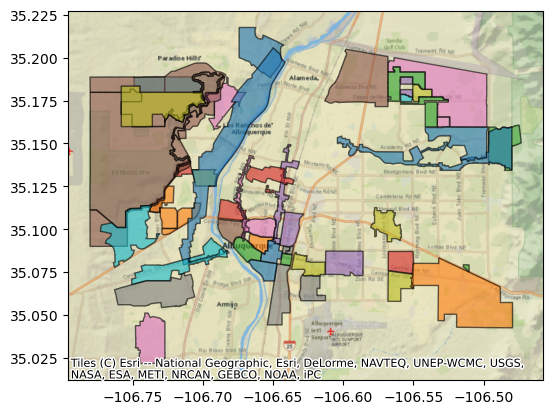

In [11]:
ax = sector_plans.plot(column='Plan', edgecolor='k', alpha=0.6)
ctx.add_basemap(ax, crs=sector_plans.crs, 
               source=ctx.providers.Esri.NatGeoWorldMap);

In [12]:
sector_plans.to_file('../../../data/local/abq_city_data.gpkg', 
                    layer='planning_sectors')
sector_plans.to_file('../../../localData/City/planning_sectors.gpkg')